---------------------------------------------------------
# Preprocesamiento paralelo de datos
# con datos del Observatorio HAWC
---------------------------------------------------------
## Programación Avanzada
## Posgrado en Ciencia e Ingeniería de la Computación
---------------------------------------------------------
### Equipo 8
### Montejano López Donovan Jesús
### Murrieta León Juan Eduardo
### Salcido Parada Alejandro
---------------------------------------------------------

### Instalación de dependencias

In [1]:
!pip install --user pandas
!pip install --user matplotlib
!pip install --user numpy
!pip install --user seaborn

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import gc
import random

In [11]:
if (os.getenv('CSVFILE')!=None):
    csvInputFile = os.getenv('CSVFILE')
else:
    while (True):
        files = os.listdir("resultados")
        csvInputFile = "resultados/"+files[-1]
        if (os.path.isfile(csvInputFile)):
            break
        else:
            print ("Archivo incorrecto")
print ("Archivo CSV: "+csvInputFile)

Archivo CSV: salida.csv


In [4]:
# Turn interactive plotting off
plt.ioff()
df = pd.read_csv(csvInputFile) 
df = df.drop(df[df['rec.coreX/F/0.1'] > 200].index)
df = df.drop(df[df['rec.coreX/F/0.1'] < -100].index)
df = df.drop(df[df['rec.coreY/F/0.1'] > 400].index)
df = df.drop(df[df['rec.coreY/F/0.1'] < 100].index)

ids = df['rec.eventID/U/1'].unique()
muestras = random.sample(range(0,len(ids)),10)

---------------------------------------------------
## Gráficas por densidad de partículas

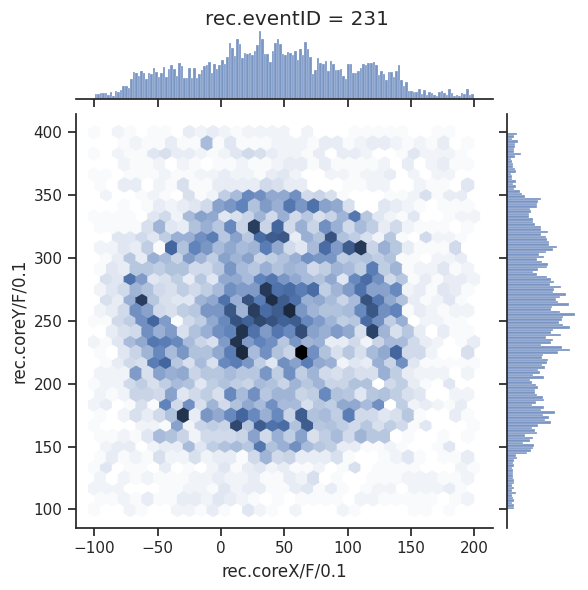

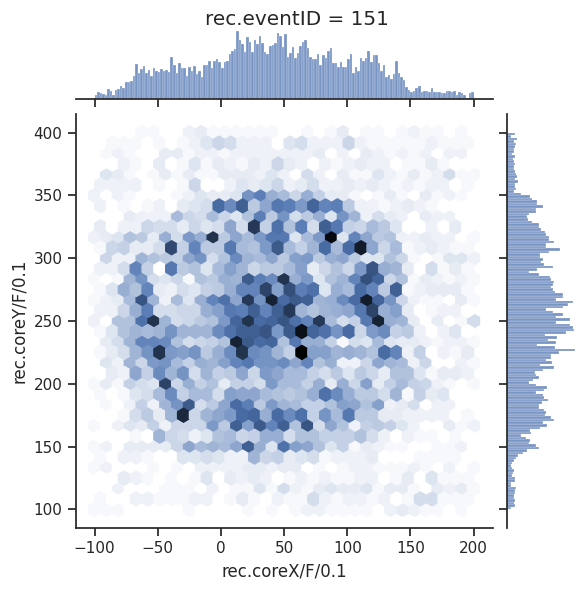

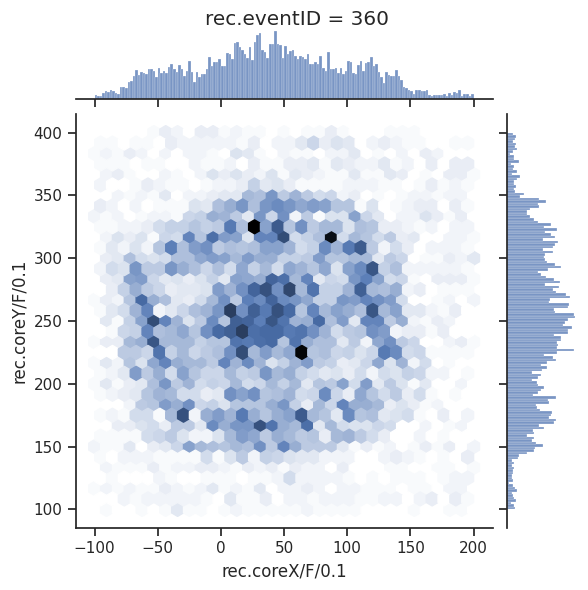

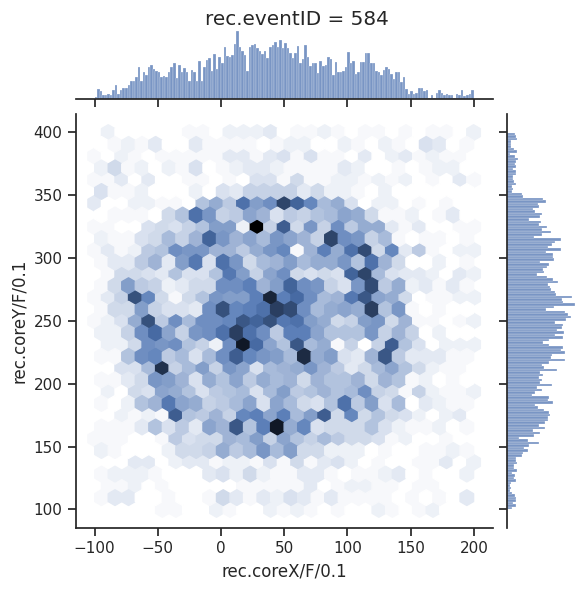

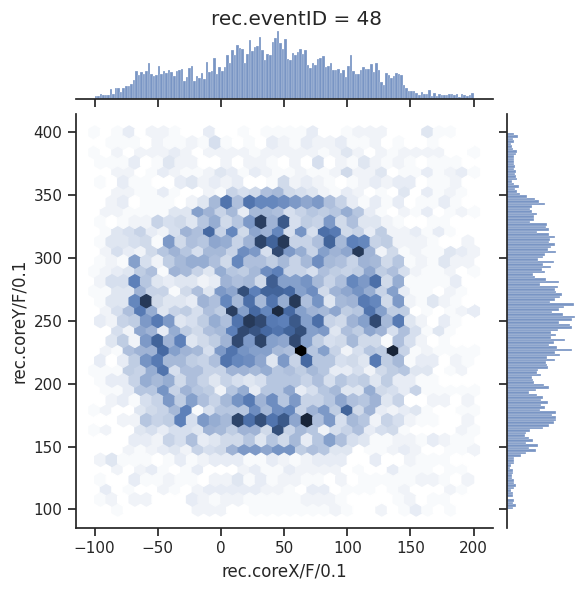

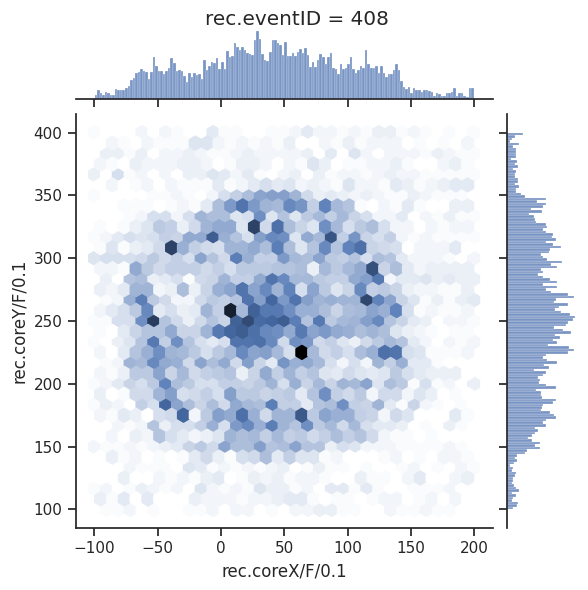

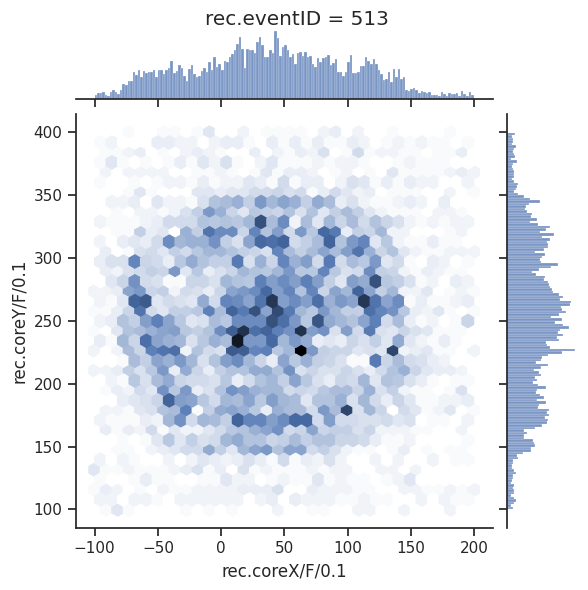

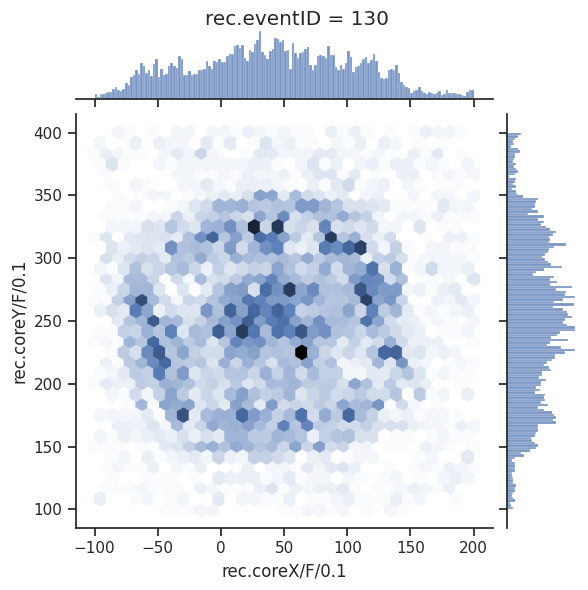

In [5]:
for id in muestras:
    df_cut = df[df['rec.eventID/U/1']==ids[id]]
    if len(df_cut)<4000:
        continue
    
    sns.set_theme(style="ticks")
    p = sns.jointplot(x=df_cut['rec.coreX/F/0.1'], y=df_cut['rec.coreY/F/0.1'],
                  marginal_kws=dict(bins=150, fill=True), kind="hex")
    p.fig.suptitle('rec.eventID = '+str(ids[id]))
    p.fig.subplots_adjust(top=0.95)
        
    plt.show()
    plt.close('all')
    del df_cut

---------------------------------------------------
## Gráficas por densidad de energía

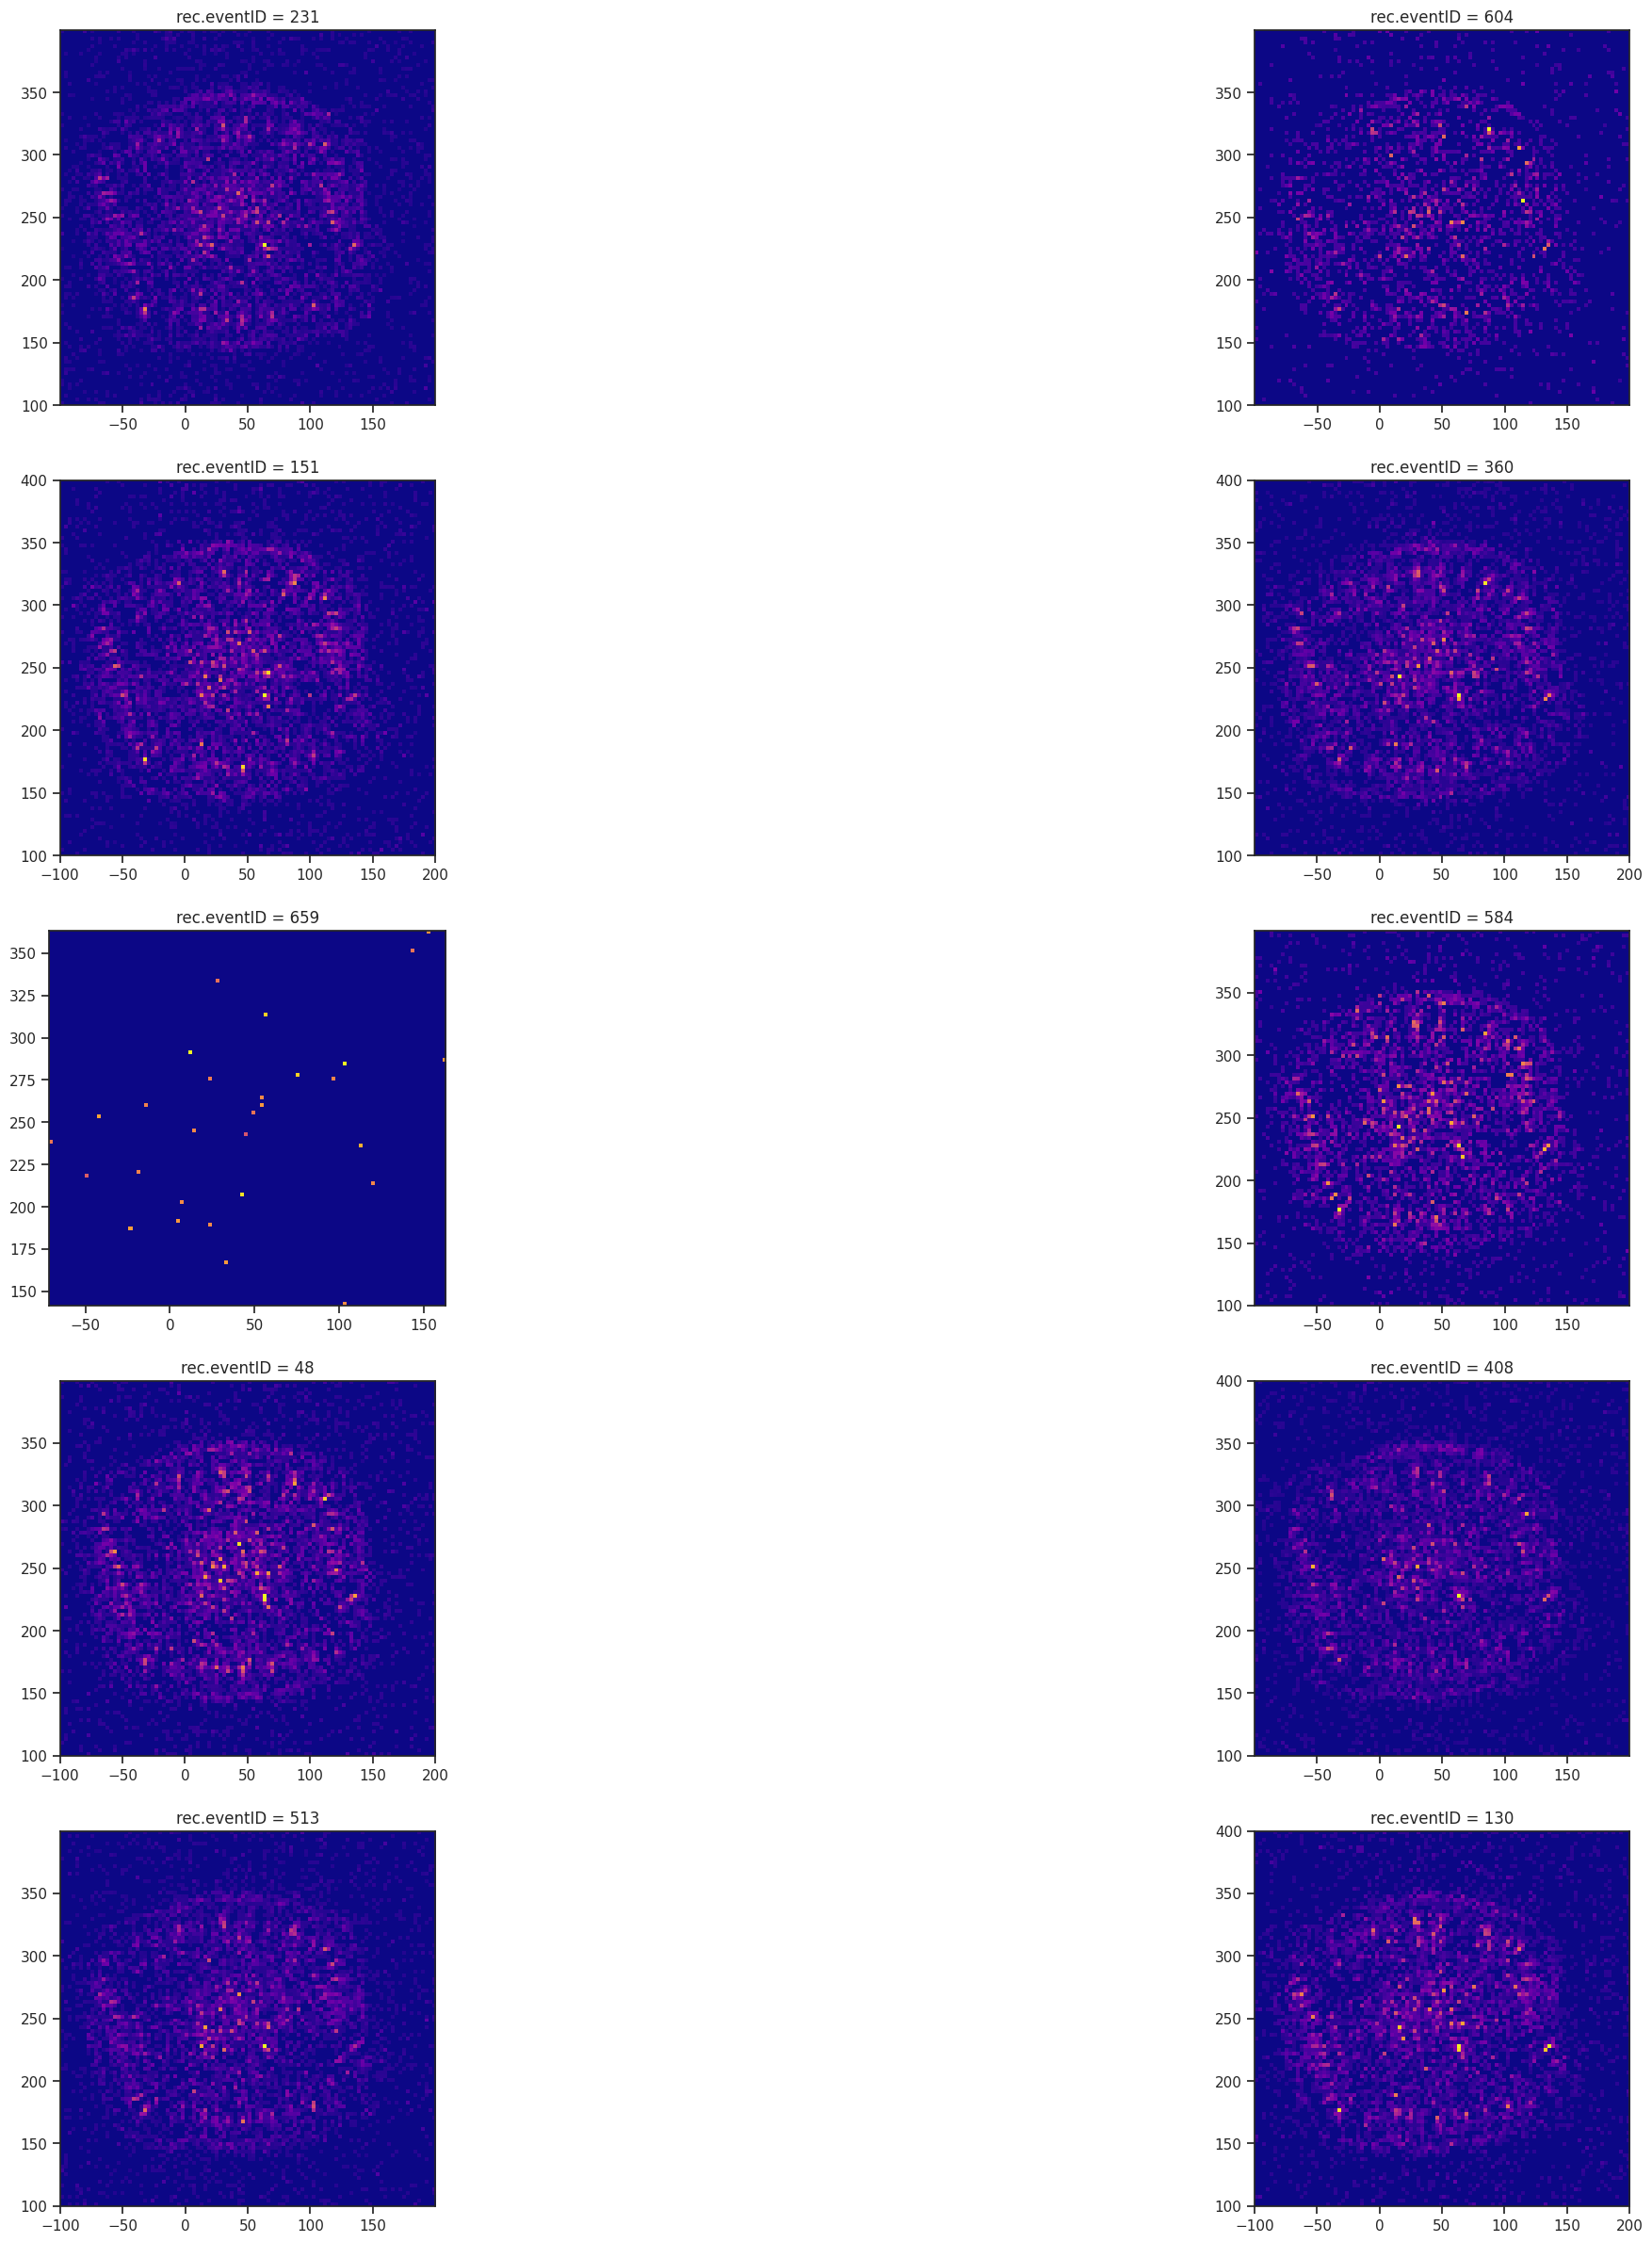

In [6]:
# Gráficas de densidad de energía
fig, axs = plt.subplots(5, 2, figsize=(30, 30))
i=-1
j=1

for id in muestras:
    df_cut = df[df['rec.eventID/U/1']==ids[id]]
    j=(j+1)%2;
    if (j==0):
        i+=1;
    #if len(df_cut)<4000:
    #    continue        
    heatmap, xedges, yedges = np.histogram2d(x=df_cut['rec.coreX/F/0.1'], y=df_cut['rec.coreY/F/0.1'],
                                             weights=df_cut['rec.logNPE/F/0.01'],density=False, bins=100)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]   
    axs[i,j].imshow(heatmap.T, extent=extent, origin='lower', cmap='plasma')    
    axs[i,j].set_title('rec.eventID = '+str(ids[id]))
    #plt.close('all') 
    del df_cut
plt.show()